In [269]:
import pandas as pd
import numpy as np

df=pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [271]:
df['deaths']=1
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,1
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,1
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,1
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,1


1.Tabela z rasami oraz informacją o chorobie psychicznej i ilością śmierci

In [274]:
df2=df.pivot_table(values='deaths',index=['race','signs_of_mental_illness'],aggfunc=np.sum)
df2

deaths
race signs_of_mental_illness        
A    False                        69
     True                         24
B    False                      1114
     True                        184
H    False                       745
     True                        157
N    False                        64
     True                         14
O    False                        37
     True                         11
W    False                      1763
     True                        713

In [292]:
rows=df2.index.tolist()
rows

[('A', False),
 ('A', True),
 ('B', False),
 ('B', True),
 ('H', False),
 ('H', True),
 ('N', False),
 ('N', True),
 ('O', False),
 ('O', True),
 ('W', False),
 ('W', True)]

lista odsetków chorób psychicznych:

In [302]:
mi_interest=[]
for i in range (0,len(rows)):
    for row in rows[i][0]:
        mi_interest.append((df2.loc[[row]]).iloc[1][0]/(df2.loc[[row]]).iloc[0][0])

mi_interest
for i in range(0,int(len(mi_interest)/2)):
    mi_interest[i*2]=''
mi_interest

['',
 0.34782608695652173,
 '',
 0.1651705565529623,
 '',
 0.21073825503355706,
 '',
 0.21875,
 '',
 0.2972972972972973,
 '',
 0.40442427680090753]

In [304]:
df2['mental_illness_interest']=mi_interest
df2

deaths mental_illness_interest
race signs_of_mental_illness                                
A    False                        69                        
     True                         24                0.347826
B    False                      1114                        
     True                        184                0.165171
H    False                       745                        
     True                        157                0.210738
N    False                        64                        
     True                         14                 0.21875
O    False                        37                        
     True                         11                0.297297
W    False                      1763                        
     True                        713                0.404424

Odp. Największy odsetek chorób psychicznych jest wśród rasy białej

Konwersja daty do formatu datetime:

In [308]:
df['date']=pd.to_datetime(df['date'])
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,1
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,1
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,1
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,1


In [ ]:
Dodawanie dnia tygodnia wydarzenia do tabeli:

In [350]:
df2=df['date'].dt.day_name()
df2.rename('day',inplace=True)
df3=pd.concat([df,df2],axis=1)
df3

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,1,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,1,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,1,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,1,Tuesday


In [ ]:
Sortowanie dni tygodnia

In [360]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df3['day'] = pd.Categorical(df3['day'], categories=cats, ordered=True)
df4=df3.sort_values('day')
df4

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths,day
949,1093,Hector Alvarez,2015-12-14,shot,undetermined,19.0,M,H,Gilroy,CA,False,undetermined,NaN,True,1,Monday
1276,1454,Efren Eloy Trujillo,2016-04-11,shot,gun,22.0,M,H,Las Vegas,NV,False,attack,Not fleeing,False,1,Monday
4533,4949,Scott Souders,2019-08-12,shot,gun,38.0,M,W,Chetopa,KS,False,attack,Not fleeing,False,1,Monday
4532,4945,Aaron Luther,2019-08-12,shot,gun,49.0,M,W,Riverside,CA,False,attack,Not fleeing,False,1,Monday
1277,1455,Pierre Loury,2016-04-11,shot,gun,16.0,M,B,Chicago,IL,False,attack,Foot,False,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,3562,Bobby Hinton,2018-04-01,shot,gun,60.0,M,B,New Llano,LA,False,attack,Not fleeing,False,1,Sunday
4012,4429,Jacob Archambault,2019-01-27,shot,vehicle,25.0,M,N,Rosebud,SD,False,attack,Car,False,1,Sunday
3232,3563,Joseph Walden Johnson,2018-04-01,shot,gun,24.0,M,W,Goodbee,LA,False,attack,Car,False,1,Sunday
2578,2862,Patrick Harmon,2017-08-13,shot,knife,50.0,M,B,Salt Lake City,UT,False,other,Foot,True,1,Sunday


Zliczanie wydarzeń wg dnia tygodnia:

In [362]:
df5=df4.pivot_table(values='deaths',index=['day'],aggfunc=np.sum)
df5

,deaths
day,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


In [ ]:
Wykres śmierci wg dnia tygodnia:

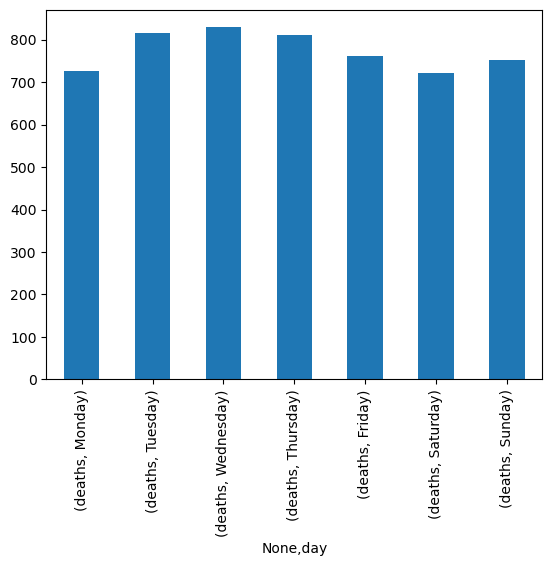

In [400]:
ax=df5.unstack(level=0).plot(kind='bar',subplots=True, rot=90,width=0.5)